In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup as bs

In [ ]:
import requests
url = f'''https://minfin.com.ua/ua/currency/converter/1-eur-to-pln/?converter-type=auction&date=01-12-2024'''

response = requests.get(url)
print(response)

<Response [200]>


In [ ]:
full_page_html = bs(response.text, "html.parser")
print(full_page_html)

In [ ]:
print(full_page_html.prettify())

In [ ]:
widget_block = full_page_html.find('div', 'zlkj5-0 kIZRLg')
print(widget_block)

<div class="zlkj5-0 kIZRLg"><label class="zlkj5-2 cPGcB"><span class="pyjcac-10 cWYHiB">Я маю</span><input class="zlkj5-1 cNCStF" type="tel" value="1"/><span class="pyjcac-10 cWYHiB">1 EUR = 4.2958 PLN</span></label></div>


In [ ]:
span_elements = widget_block.find_all('span', 'pyjcac-10')
print(span_elements)

[<span class="pyjcac-10 cWYHiB">Я маю</span>, <span class="pyjcac-10 cWYHiB">1 EUR = 4.2958 PLN</span>]


In [ ]:
second_span = span_elements[1]
exchange_rate = second_span.text
print(exchange_rate)

1 EUR = 4.2958 PLN


In [ ]:
from datetime import datetime, timedelta

start_date = datetime(2024, 12, 20)
end_date = datetime(2025, 1, 10)

dates = []
url_path = f'''https://minfin.com.ua/ua/currency/converter/1-eur-to-pln/?converter-type=auction&date='''
current_date = start_date
while current_date <= end_date:
    dates.append(current_date.date().strftime('%d-%m-%Y'))
    current_date += timedelta(days=1)

urls = [url_path + date for date in dates]

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
from datetime import datetime, timedelta

start_date = datetime(2024, 12, 20)
end_date = datetime(2025, 1, 10)

dates = []
url_path = f'''https://minfin.com.ua/ua/currency/converter/1-eur-to-pln/?converter-type=auction&date='''
current_date = start_date
while current_date <= end_date:
    dates.append(current_date.date().strftime('%d-%m-%Y'))
    current_date += timedelta(days=1)


urls = [url_path + date for date in dates]

eur_to_pln = []

for url in urls:
  response = requests.get(url)
  full_page_html = bs(response.text, "html.parser")
  widget_block = full_page_html.find('div', 'zlkj5-0 kIZRLg')
  span_elements = widget_block.find_all('span', 'pyjcac-10')

  if len(span_elements) >=2:
    second_span = span_elements[1]
    exchange_rate = second_span.text
  else: exchange_rate = None

  eur_to_pln.append(exchange_rate)

exchange_currency = {'exchange_at':dates, 'eur_to_pln': eur_to_pln}

exchange_currency_df = pd.DataFrame(exchange_currency)

exchange_currency_df['exchange'] = exchange_currency_df['eur_to_pln'].str.extract(r'(\d+\.\d+)').astype(float)

exchange_currency_df

,exchange_at,eur_to_pln,exchange
0,20-12-2024,1 EUR = 4.2306 PLN,4.2306
1,21-12-2024,1 EUR = 4.2429 PLN,4.2429
2,22-12-2024,1 EUR = 4.2452 PLN,4.2452
3,23-12-2024,1 EUR = 4.2404 PLN,4.2404
4,24-12-2024,1 EUR = 4.2405 PLN,4.2405
5,25-12-2024,1 EUR = 4.2512 PLN,4.2512
6,26-12-2024,1 EUR = 4.2464 PLN,4.2464
7,27-12-2024,1 EUR = 4.2601 PLN,4.2601
8,28-12-2024,1 EUR = 4.2656 PLN,4.2656
9,29-12-2024,1 EUR = 4.2657 PLN,4.2657


In [ ]:
import pandas as pd

exchange_currency_df['exchange'] = exchange_currency_df['eur_to_pln'].str.extract(r'(\d+\.\d+)').astype(float)
file_name = 'exchange_rates_eur_pln.xlsx'
exchange_currency_df.to_excel(file_name, index=False)

print(f"Дані успішно збережено у файл {file_name}")

Дані успішно збережено у файл exchange_rates_eur_pln.xlsx


In [ ]:
file_name = '/content/exchange_rates_eur_pln.xlsx'
exchange_currency_df.to_excel(file_name, index=False)
print(f"Файл збережено у {file_name}")

Файл збережено у /content/exchange_rates_eur_pln.xlsx


In [ ]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_excel(list(uploaded.keys())[0])

Saving exchange_rates_eur_pln.xlsx to exchange_rates_eur_pln (1).xlsx


<ipython-input-15-20dfbe7a8c3f>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['exchange_at'] = pd.to_datetime(data['exchange_at'])


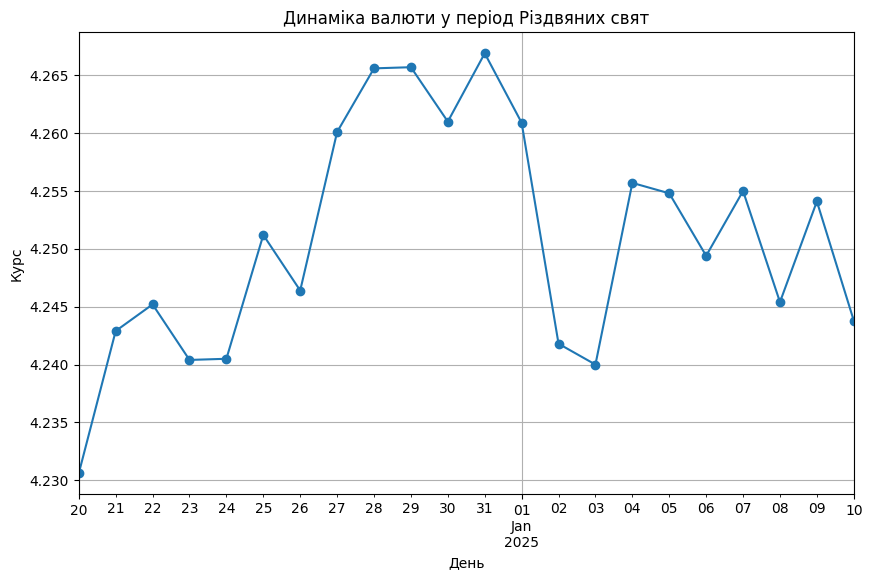

,exchange
exchange_at,
2024-12-20,4.2306
2024-12-21,4.2429
2024-12-22,4.2452
2024-12-23,4.2404
2024-12-24,4.2405
2024-12-25,4.2512
2024-12-26,4.2464
2024-12-27,4.2601
2024-12-28,4.2656


In [ ]:
data['exchange_at'] = pd.to_datetime(data['exchange_at'])

import matplotlib.pyplot as plt

exchange_currency_by_days = data.groupby('exchange_at')['exchange'].sum()

exchange_currency_by_days.plot(kind='line', marker='o', figsize=(10, 6), title='Динаміка валюти у період Різдвяних свят')
plt.xlabel('День')
plt.ylabel('Курс')
plt.grid(True)
plt.show()

exchange_currency_by_days